# Practice Session 01+02: Data preparation

<font size="+2" color="blue">Additional results: model purchased device</font>

Author: <font color="blue">Guillem Escriba Molto</font>

E-mail: <font color="blue">guillem.escriba01@estudiant.upf.edu</font>

Date: <font color="blue">07/10/2022</font>

# 1. Exploratory data analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [3]:
input_dataset.head(3) # Prints the 3 first rows of data (0,1,2) and the header

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.5,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.7,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.1,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [4]:
column_type_df = pd.DataFrame(columns=['Column', 'Datatype']) # Init dataset
for column in input_dataset.columns: # Iterates for each column
    datatype = input_dataset[column].dtype # Returns the datatype
    column_type_df = column_type_df.append({'Column': column, 'Datatype': datatype},ignore_index=True) # Fill the dataset
display(column_type_df) # Shows the dataset

,Column,Datatype
0,PURCHASED_DEVICE,object
1,DEVICE_VALUE,float64
2,LAST_DEVICE_CHANGE,float64
3,DATA_TRAFFIC_MONTH_1,float64
4,DATA_TRAFFIC_MONTH_2,float64
5,DATA_TRAFFIC_MONTH_3,float64
6,DATA_TRAFFIC_MONTH_4,float64
7,DATA_TRAFFIC_MONTH_5,float64
8,DATA_TRAFFIC_MONTH_6,float64
9,VOICE_TRAFFIC_MONTH_1,float64


In [5]:
stats_df = pd.DataFrame(columns=['Column', 'Mean','Median','Maximum','Minimum']) 
for column in input_dataset.columns:
    datatype = input_dataset[column].dtype
    if datatype == float: # Check if is a float
        mean = np.mean(input_dataset[column]) # Computes the mean
        median = np.nanmedian(input_dataset[column]) # " the median
        maximum = np.max(input_dataset[column]) # "" the maximum
        minimum = np.min(input_dataset[column]) # "" the minimum
        stats_df = stats_df.append({'Column': column, 'Mean': mean, 'Median': median, 'Maximum': maximum ,'Minimum': minimum},ignore_index=True)
display(stats_df)

,Column,Mean,Median,Maximum,Minimum
0,DEVICE_VALUE,7.504842e+02,3.930000e+02,9.057000e+03,15.00
1,LAST_DEVICE_CHANGE,2.016698e+07,2.017060e+07,2.019050e+07,20121001.00
2,DATA_TRAFFIC_MONTH_1,3.481826e+03,1.208728e+03,1.270176e+05,0.00
3,DATA_TRAFFIC_MONTH_2,3.649958e+03,1.294951e+03,1.119488e+05,0.00
4,DATA_TRAFFIC_MONTH_3,3.653427e+03,1.310675e+03,1.119488e+05,0.00
5,DATA_TRAFFIC_MONTH_4,3.269441e+03,1.176539e+03,8.785641e+04,0.00
6,DATA_TRAFFIC_MONTH_5,3.673368e+03,1.287094e+03,1.218348e+05,0.00
7,DATA_TRAFFIC_MONTH_6,3.427690e+03,1.277116e+03,9.055061e+04,0.00
8,VOICE_TRAFFIC_MONTH_1,1.548522e+02,8.405000e+01,4.220100e+03,0.00
9,VOICE_TRAFFIC_MONTH_2,1.425679e+02,7.490000e+01,3.132100e+03,0.00


In [6]:
for column in input_dataset.columns:
    print("\nColumn name: {} {}\n".format(column,input_dataset[column].describe())) # Print the stats


Column name: PURCHASED_DEVICE count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object


Column name: DEVICE_VALUE count    9690.000000
mean      750.484211
std       979.710272
min        15.000000
25%       297.000000
50%       393.000000
75%       609.000000
max      9057.000000
Name: DEVICE_VALUE, dtype: float64


Column name: LAST_DEVICE_CHANGE count    7.682000e+03
mean     2.016698e+07
std      1.092577e+04
min      2.012100e+07
25%      2.016080e+07
50%      2.017060e+07
75%      2.017100e+07
max      2.019050e+07
Name: LAST_DEVICE_CHANGE, dtype: float64


Column name: DATA_TRAFFIC_MONTH_1 count      8868.000000
mean       3481.825663
std        6364.542706
min           0.000000
25%          51.923114
50%        1208.728050
75%        4249.164900
max      127

In [7]:
print(input_dataset.BILLING_MONTH_1.describe())
print(stats_df.loc[14])

count    9999.000000
mean      102.344564
std        67.787155
min      -128.010000
25%        66.000000
50%        94.990000
75%       121.470000
max      1569.100000
Name: BILLING_MONTH_1, dtype: float64
Column     BILLING_MONTH_1
Mean            102.344564
Median               94.99
Maximum             1569.1
Minimum            -128.01
Name: 14, dtype: object


<font size="+1">I have printed both stats and I can't see any difference, it may be a computation error or I may misunderstood the exercise.</font>

## 1.2. Inventory of device models

In [8]:
prev_model_df = pd.DataFrame(columns=['Device Model', 'Frequency']) 
for idx, name in enumerate(input_dataset.PREVIOUS_DEVICE_MODEL.value_counts().index.tolist()): # This line is used to hold the device model names without adding more code
    prev_model_df = prev_model_df.append({'Device Model': name, 'Frequency': input_dataset.PREVIOUS_DEVICE_MODEL.value_counts()[idx]},ignore_index=True) # The second parameter adds the frequency 
display(prev_model_df)

prev_brand_df = pd.DataFrame(columns=['Brand', 'Frequency']) 
for idx, name in enumerate(input_dataset.PREVIOUS_DEVICE_BRAND.value_counts().index.tolist()):
    prev_brand_df = prev_brand_df.append({'Brand': name, 'Frequency': input_dataset.PREVIOUS_DEVICE_BRAND.value_counts()[idx]},ignore_index=True)
display(prev_brand_df)

,Device Model,Frequency
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204
...,...,...
575,LG-X210ds,1
576,"RM-969, Nokia 220",1
577,8900,1
578,Studio Touch,1


,Brand,Frequency
0,Samsung,1877
1,Outros,1592
2,Apple,1548
3,Motorola,638
4,LG,514


<font size="+1"> This should be due to the amount of different models of the devices of each brand. It is possible that although the most common device of Samsung is less common than the devices of Apple, Samsung may have more device models and then taking into account every single model Samsung is more common than Apple.</font>

# 2. Feature engineering

## 2.1. Missing values management

In [9]:
nan_counter = pd.DataFrame(columns=['Column', 'NaN count'])
for column in input_dataset.columns:
    count = input_dataset[column].isna().sum() # Beacause of NaN values are a boolean they can be added.
    nan_counter = nan_counter.append({'Column': column, 'NaN count': count},ignore_index=True)
display(nan_counter)

,Column,NaN count
0,PURCHASED_DEVICE,147
1,DEVICE_VALUE,310
2,LAST_DEVICE_CHANGE,2318
3,DATA_TRAFFIC_MONTH_1,1132
4,DATA_TRAFFIC_MONTH_2,1159
5,DATA_TRAFFIC_MONTH_3,1154
6,DATA_TRAFFIC_MONTH_4,1183
7,DATA_TRAFFIC_MONTH_5,1134
8,DATA_TRAFFIC_MONTH_6,1465
9,VOICE_TRAFFIC_MONTH_1,1132


In [10]:
# This code is what is asked for in the exercise but then there will be NaN values in LAST_DEVICE_CHANGE,LINE_ACTIVATION_DATE
# MONTHS_LAST_DEVICE and DURATION_LINE and it will cause an error so I decided to use the next cell instead of this one where
# I droped NaN values too

#df1 = input_dataset.dropna(subset = ['PURCHASED_DEVICE','DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND'])
#df2 = df1.fillna(value = {'DATA_TRAFFIC_MONTH_1':0,'DATA_TRAFFIC_MONTH_2':0,'DATA_TRAFFIC_MONTH_3':0,
#                           'DATA_TRAFFIC_MONTH_4':0,'DATA_TRAFFIC_MONTH_5':0,'DATA_TRAFFIC_MONTH_6':0,
#                           'VOICE_TRAFFIC_MONTH_1':0,'VOICE_TRAFFIC_MONTH_2':0,'VOICE_TRAFFIC_MONTH_3':0,
#                           'VOICE_TRAFFIC_MONTH_4':0,'VOICE_TRAFFIC_MONTH_5':0,'VOICE_TRAFFIC_MONTH_6':0,
#                           'BILLING_MONTH_1':0,'BILLING_MONTH_2':0,'BILLING_MONTH_3':0,
#                           'BILLING_MONTH_4':0,'BILLING_MONTH_5':0,'BILLING_MONTH_6':0,
#                          'DEVICE_COST_MONTH_1':0,'DEVICE_COST_MONTH_2':0,'DEVICE_COST_MONTH_3':0,
#                           'DEVICE_COST_MONTH_4':0,'DEVICE_COST_MONTH_5':0,'DEVICE_COST_MONTH_6':0})
#df2["LINE_ACTIVATION_DATE"].fillna(df2["LAST_DEVICE_CHANGE"])
#df2.head(5)

In [11]:
# Here I remove every NaN row included the conflicting ones

df1 = input_dataset.dropna(subset = ['PURCHASED_DEVICE','DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND','LAST_DEVICE_CHANGE','LINE_ACTIVATION_DATE',
'MONTHS_LAST_DEVICE', 'DURATION_LINE']) # Removing  NaN rows
df1["LINE_ACTIVATION_DATE"].fillna(df1["LAST_DEVICE_CHANGE"]) # Filling NaN values in LINE_ACTIVATION_DATE with LAST_DEVICE_CHANGE
df2 = df1.fillna(0) # Filling the other columns NaNs with 0s.
df2.head(5)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.50000,...,0.0,0.0,0.0,0.0,20170905.0,15.0,15.0,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.89999,...,0.0,0.0,0.0,0.0,20100809.0,41.0,100.0,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [12]:
# This code will fill NaN with zeros

#df1 = input_dataset.dropna(subset = ['PURCHASED_DEVICE','DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND']) # Removing  NaN rows
#df1["LINE_ACTIVATION_DATE"].fillna(df1["LAST_DEVICE_CHANGE"]) # Filling NaN values in LINE_ACTIVATION_DATE with LAST_DEVICE_CHANGE
#df2 = df1.fillna(0) # Filling the other columns NaNs with 0s.
#df2.head(5)

In [13]:
# Printing again NaN counter
nan_counter = pd.DataFrame(columns=['Column', 'NaN count'])
for column in df2.columns:
    count = df2[column].isna().sum()
    nan_counter = nan_counter.append({'Column': column, 'NaN count': count},ignore_index=True)
display(nan_counter)

,Column,NaN count
0,PURCHASED_DEVICE,0
1,DEVICE_VALUE,0
2,LAST_DEVICE_CHANGE,0
3,DATA_TRAFFIC_MONTH_1,0
4,DATA_TRAFFIC_MONTH_2,0
5,DATA_TRAFFIC_MONTH_3,0
6,DATA_TRAFFIC_MONTH_4,0
7,DATA_TRAFFIC_MONTH_5,0
8,DATA_TRAFFIC_MONTH_6,0
9,VOICE_TRAFFIC_MONTH_1,0


In [14]:
M = input_dataset.shape[0] # Original number of rows
N = df2.shape[0] # New number of rows
print("Rows in the original dataset: {}\nRows in the new dataset: {} ({}% less)".format(M,N,100*(M-N)/M))

Rows in the original dataset: 10000
Rows in the new dataset: 4230 (57.7% less)


## 2.2. Distributions, outliers, and correlations

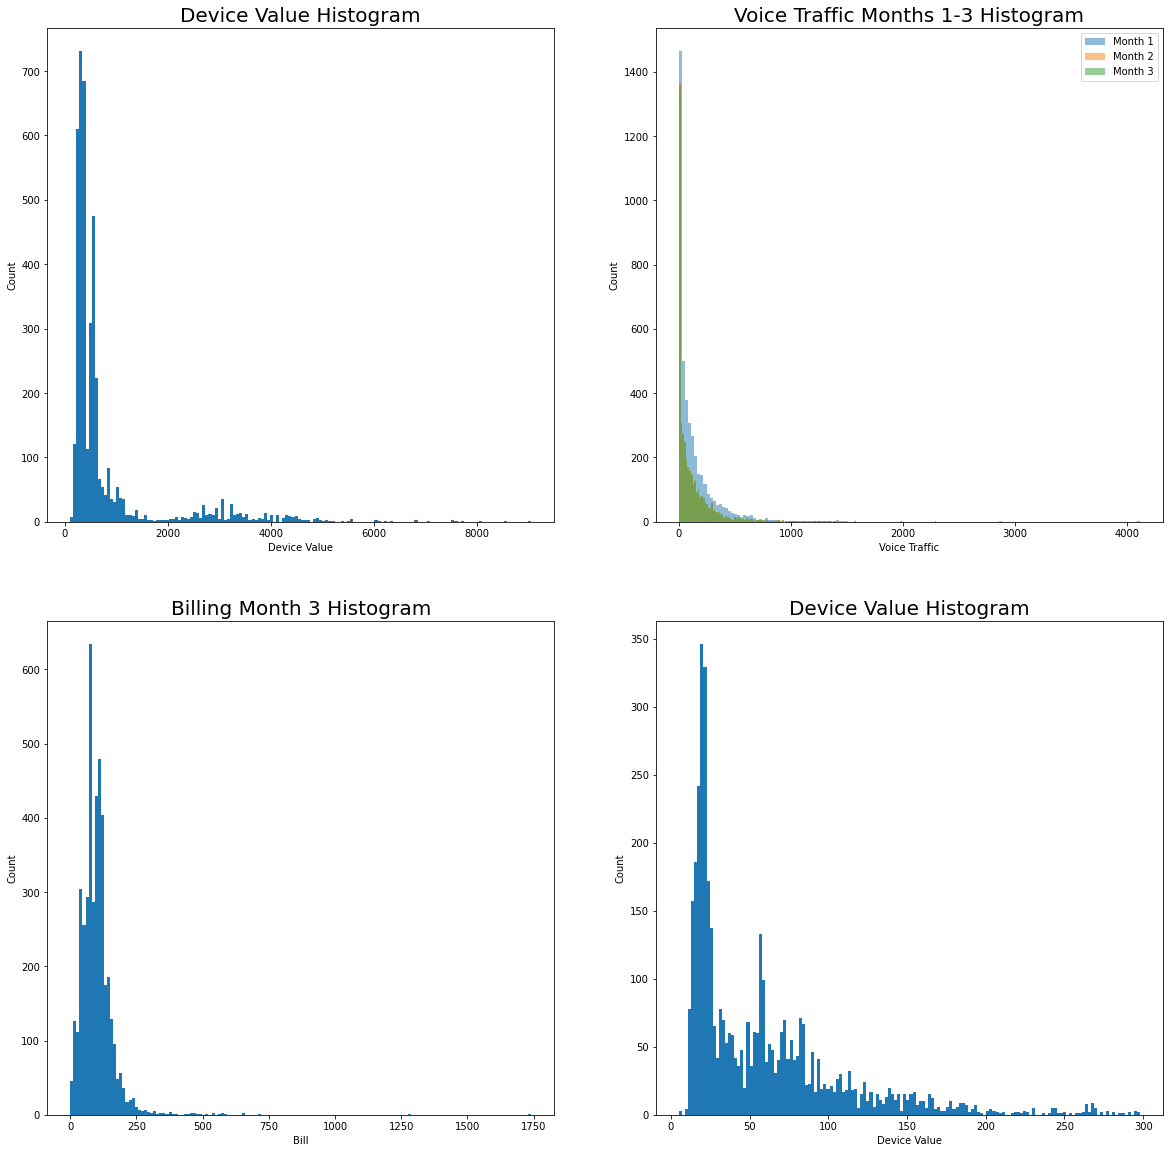

In [15]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(20,20)) # The number of figures,subplots, of eacj row

# DEVICE VALUE HISTOGRAM
ax0.hist(df2.DEVICE_VALUE, bins=150) # create a 150 bins histogram
plt.setp(ax0, xlabel='Device Value') # x,y labels
plt.setp(ax0, ylabel='Count')
ax0.set_title("Device Value Histogram", fontsize = 20.0) # Set the title

# VOICE TRAFFIC MONTHS 1-3 HISTOGRAM
ax1.hist(df2.VOICE_TRAFFIC_MONTH_1, bins=150, alpha=0.5, label="Month 1") # Multiple histograms
ax1.hist(df2.VOICE_TRAFFIC_MONTH_2, bins=150, alpha=0.5, label="Month 2")
ax1.hist(df2.VOICE_TRAFFIC_MONTH_3, bins=150, alpha=0.5, label="Month 3")
plt.setp(ax1, xlabel='Voice Traffic')
plt.setp(ax1, ylabel='Count')
ax1.set_title("Voice Traffic Months 1-3 Histogram" , fontsize = 20.0)
ax1.legend(loc='upper right') # Print the legend

# BILLING MONTH 3 HISTOGRAM
ax2.hist(df2.BILLING_MONTH_3, bins=150)
plt.setp(ax2, xlabel='Bill')
plt.setp(ax2, ylabel='Count')
ax2.set_title("Billing Month 3 Histogram", fontsize = 20.0)

# DURATION LINE HISTOGRAM
ax3.hist(df2.DURATION_LINE, bins=150)
plt.setp(ax3, xlabel='Device Value')
plt.setp(ax3, ylabel='Count')
ax3.set_title("Device Value Histogram", fontsize = 20.0)


plt.show() # Show the subplots

<font size="+1"> I am sure that Voice Traffic plots are a Exponential Distribution and I would say that Device Value is some kind of exponential too, Billing of Month 3 I am not sure at all but it could be an Normal centered at 125 aprox. The last one I don't know but it may be another exponential. </font>

Text(0.5, 1.0, 'Device Value Histogram')

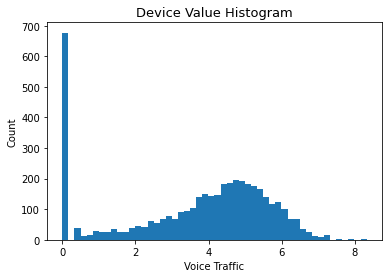

In [16]:
plt.hist(np.log((df2.VOICE_TRAFFIC_MONTH_1)+1), bins=50)  # Applying the formula to the data series
plt.xlabel(xlabel='Voice Traffic')
plt.ylabel(ylabel='Count')
plt.title("Device Value Histogram", fontsize = 13.0)

[Text(0.5, 0, 'Billing Boxplot')]

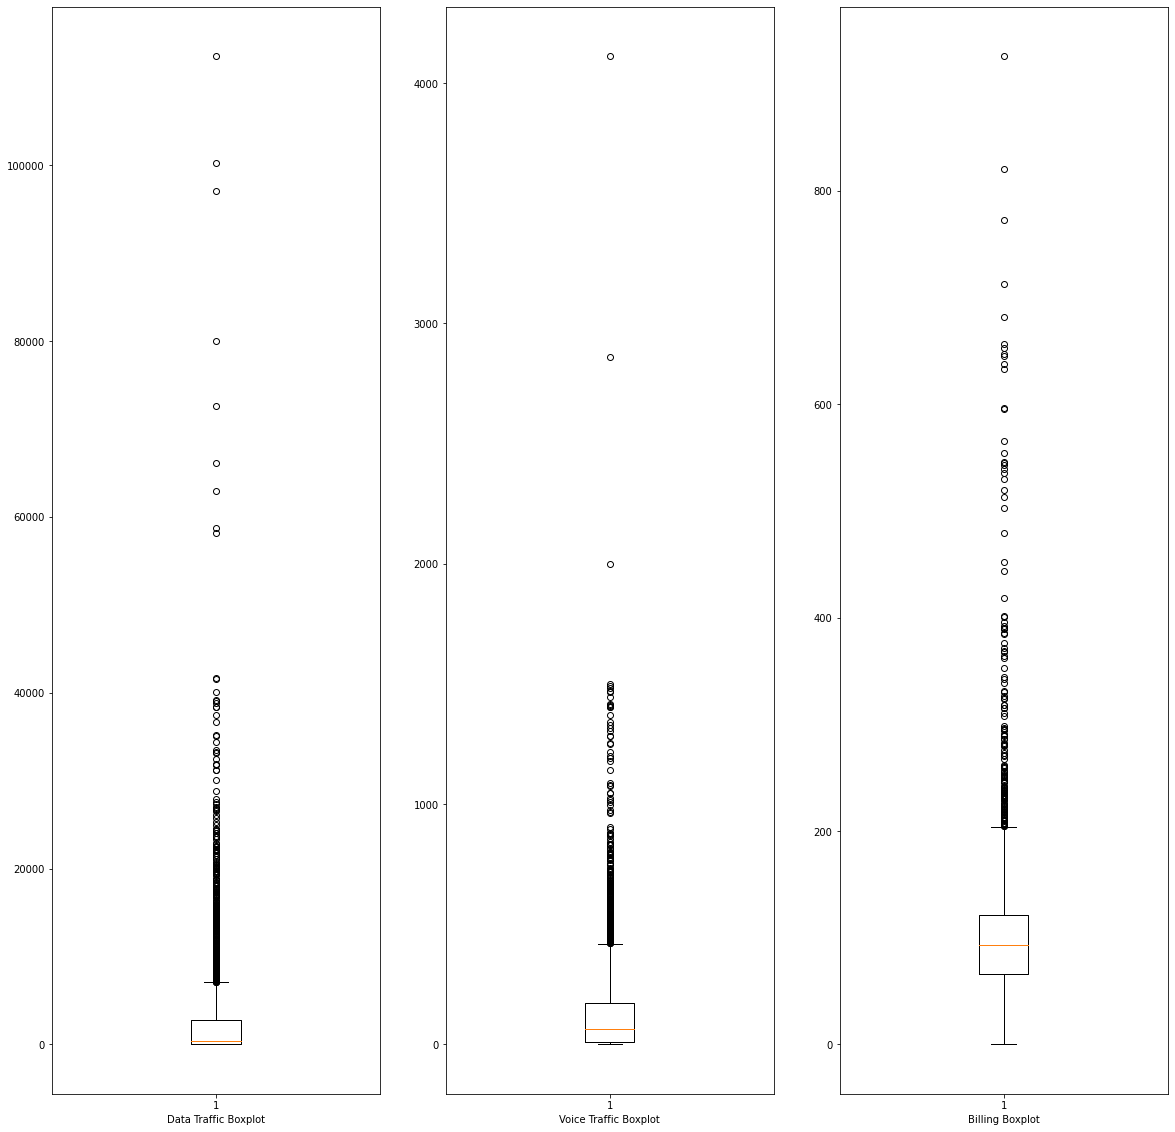

In [17]:
fig, ((ax0, ax1,  ax2)) = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

ax0.boxplot(df2.DATA_TRAFFIC_MONTH_1) # Creates the boxplot
plt.setp(ax0, xlabel='Data Traffic Boxplot') # Sets the title

ax1.boxplot(df2.VOICE_TRAFFIC_MONTH_1)
plt.setp(ax1, xlabel='Voice Traffic Boxplot')

ax2.boxplot(df2.BILLING_MONTH_1)
plt.setp(ax2, xlabel='Billing Boxplot')



<font size="+1">For the first one I would use 8000 as a threshold, for the next one I would use 400 and for the last one I would remove the negative values and the values higher than 220.</font>

In [18]:
co_df2 = df2.drop(['LAST_DEVICE_CHANGE','LINE_ACTIVATION_DATE','MONTHS_LAST_DEVICE','DURATION_LINE'],axis=1) # Drop the unnecesary columns
co_matrix = co_df2.corr() # Create the correlation matrix
co_matrix

,DEVICE_VALUE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,...,BILLING_MONTH_3,BILLING_MONTH_4,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6
DEVICE_VALUE,1.000000,0.127743,0.119157,0.117658,0.121327,0.124107,0.123602,0.004220,-0.001592,-0.001486,...,0.087570,0.109462,0.100204,0.103794,0.087410,0.096789,0.135523,0.126159,0.133776,0.135767
DATA_TRAFFIC_MONTH_1,0.127743,1.000000,0.734297,0.732869,0.698272,0.661242,0.599019,0.093995,0.072425,0.072522,...,0.181634,0.203021,0.191593,0.193030,0.013557,0.056768,0.088797,0.084076,0.087875,0.089296
DATA_TRAFFIC_MONTH_2,0.119157,0.734297,1.000000,0.997635,0.788476,0.765023,0.678236,0.088388,0.086719,0.085760,...,0.174024,0.201627,0.196254,0.202605,0.013576,0.052345,0.068572,0.076148,0.077400,0.080600
DATA_TRAFFIC_MONTH_3,0.117658,0.732869,0.997635,1.000000,0.787742,0.764261,0.677576,0.089525,0.088090,0.086778,...,0.179746,0.207168,0.201672,0.209562,0.013569,0.052215,0.068403,0.075186,0.076377,0.079218
DATA_TRAFFIC_MONTH_4,0.121327,0.698272,0.788476,0.787742,1.000000,0.825148,0.702191,0.092877,0.090645,0.089378,...,0.197640,0.212595,0.213427,0.230115,0.011411,0.048647,0.070385,0.067778,0.071671,0.075487
DATA_TRAFFIC_MONTH_5,0.124107,0.661242,0.765023,0.764261,0.825148,1.000000,0.802989,0.093837,0.096802,0.095957,...,0.198368,0.222296,0.207374,0.224159,0.006358,0.033372,0.076351,0.058534,0.060390,0.062851
DATA_TRAFFIC_MONTH_6,0.123602,0.599019,0.678236,0.677576,0.702191,0.802989,1.000000,0.076719,0.070939,0.070389,...,0.184457,0.206050,0.187454,0.195570,0.015199,0.054320,0.100051,0.078748,0.082327,0.087891
VOICE_TRAFFIC_MONTH_1,0.004220,0.093995,0.088388,0.089525,0.092877,0.093837,0.076719,1.000000,0.792677,0.791016,...,0.116010,0.107755,0.107471,0.111286,-0.009012,0.001907,0.011491,0.005655,0.009528,0.012488
VOICE_TRAFFIC_MONTH_2,-0.001592,0.072425,0.086719,0.088090,0.090645,0.096802,0.070939,0.792677,1.000000,0.996216,...,0.108031,0.083902,0.088000,0.091338,-0.005298,0.009417,-0.001328,0.005999,0.006192,0.006240
VOICE_TRAFFIC_MONTH_3,-0.001486,0.072522,0.085760,0.086778,0.089378,0.095957,0.070389,0.791016,0.996216,1.000000,...,0.108238,0.084106,0.087699,0.089510,-0.005161,0.009709,-0.001079,0.006758,0.006930,0.007340


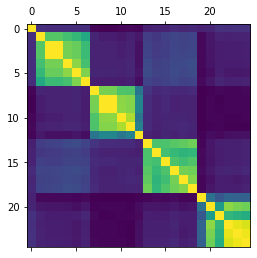

In [19]:
plt.matshow(co_matrix) # Plot the correlation matrix, where the matrix is yellow is where the correlation coefficient is near to 1 and where the matrix is darker, is near to 0.

<font size="+1">As we can see in the table and in the plot, the zone whith light blue is more correlated than the darker one so Data Traffic is more correlated with the bill than Voice traffic (0'2 vs 0'12 aprox).</font>

## 2.3. Date management and period calculation

In [20]:
latest = int(max(df2.LAST_DEVICE_CHANGE)) # Convert the last change to int
now = str(latest + 30) # Adds 30 days and convert it to string
latest = str(latest) # String conversion
latest = datetime.datetime.strptime(latest,'%Y%m%d') # Save as datetime object
now = datetime.datetime.strptime(now,'%Y%m%d')
print(latest) 
print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


In [21]:
series_converted = df2
series_converted['LAST_DEVICE_CHANGE'] = pd.to_datetime(series_converted['LAST_DEVICE_CHANGE'], format='%Y%m%d') # Convert the data to datetime
series_converted['MONTHS_LAST_DEVICE'] = (now - series_converted['LAST_DEVICE_CHANGE'])/datetime.timedelta(days=30) # Compute the difference in months
display(series_converted)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,26.333333,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,20.233333,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,5.000000,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,2017-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.50000,...,0.0,0.0,0.0,0.0,20170905.0,21.233333,15.0,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2015-07-01,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.89999,...,0.0,0.0,0.0,0.0,20100809.0,47.666667,100.0,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI...,777.0,2016-10-01,6128.30660,3760.83910,3760.83910,7806.48000,10558.91200,14171.10200,1.20000,...,0.0,0.0,0.0,0.0,20161011.0,32.400000,26.0,iPhone 7 Plus,Apple Inc,Apple
9991,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,2015-02-01,3534.23830,1978.74760,1978.74760,1949.49350,1287.23540,1152.37480,109.70000,...,0.0,0.0,0.0,0.0,20060816.0,52.666667,148.0,Samsung Galaxy J5,Samsung Korea,Samsung
9992,TGMO36012000_MOTOROLA XT1925 SMARTPHONE INDIGO,561.0,2016-01-01,634.19067,634.19067,105.11343,4992.17820,6392.00830,6392.00830,146.30000,...,0.0,0.0,0.0,0.0,20090623.0,41.533333,117.0,Samsung Galaxy S8 Plus,Samsung Korea,Samsung
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,0.0,0.0,0.0,0.0,20170419.0,26.333333,20.0,iPhone 7 Plus,Apple Inc,Apple


In [22]:
series_converted['LINE_ACTIVATION_DATE'] = pd.to_datetime(series_converted['LINE_ACTIVATION_DATE'], format='%Y%m%d')
series_converted['DURATION_LINE'] = now - series_converted['LINE_ACTIVATION_DATE']
display(series_converted)
# Print the average in years
print(('The average of duration line in years is {}').format(series_converted['DURATION_LINE'].mean()/datetime.timedelta(days=365)))

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,2017-04-05,26.333333,786 days,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,2011-08-25,20.233333,2836 days,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,2014-06-17,5.000000,1809 days,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,2017-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.50000,...,0.0,0.0,0.0,0.0,2017-09-05,21.233333,633 days,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2015-07-01,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.89999,...,0.0,0.0,0.0,0.0,2010-08-09,47.666667,3217 days,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI...,777.0,2016-10-01,6128.30660,3760.83910,3760.83910,7806.48000,10558.91200,14171.10200,1.20000,...,0.0,0.0,0.0,0.0,2016-10-11,32.400000,962 days,iPhone 7 Plus,Apple Inc,Apple
9991,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,2015-02-01,3534.23830,1978.74760,1978.74760,1949.49350,1287.23540,1152.37480,109.70000,...,0.0,0.0,0.0,0.0,2006-08-16,52.666667,4671 days,Samsung Galaxy J5,Samsung Korea,Samsung
9992,TGMO36012000_MOTOROLA XT1925 SMARTPHONE INDIGO,561.0,2016-01-01,634.19067,634.19067,105.11343,4992.17820,6392.00830,6392.00830,146.30000,...,0.0,0.0,0.0,0.0,2009-06-23,41.533333,3629 days,Samsung Galaxy S8 Plus,Samsung Korea,Samsung
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,0.0,0.0,0.0,0.0,2017-04-19,26.333333,772 days,iPhone 7 Plus,Apple Inc,Apple


The average of duration line in years is 5.047873959648953



## 2.4. Standarization and scaling of numerical variables

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,DATA_TRAFFIC_MONTH_1_STAND,DATA_TRAFFIC_MONTH_1_MINMAX,VOICE_TRAFFIC_MONTH_1_STAND,VOICE_TRAFFIC_MONTH_1_MINMAX,BILLING_MONTH_1_STAND,BILLING_MONTH_1_MINMAX,DEVICE_COST_MONTH_1_STAND,DEVICE_COST_MONTH_1_MINMAX
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,Samsung Korea,Samsung,-0.404557,0.002066,-0.635999,0.000900,-0.814598,0.051295,-0.121701,0.000000
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,Apple Inc,Apple,0.254411,0.037853,0.205836,0.042718,-0.618884,0.065187,-0.066906,0.000932
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,"Motorola Mobility LLC, a Lenovo Company",Outros,0.378670,0.044601,1.224847,0.093338,0.146029,0.119483,-0.121701,0.000000
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,2017-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.50000,...,Telit Communications SpA,Outros,-0.442596,0.000000,-0.123067,0.026380,0.026654,0.111009,-0.121701,0.000000
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2015-07-01,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.89999,...,"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.257986,0.010026,1.161220,0.090177,-0.089984,0.102730,-0.121701,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI...,777.0,2016-10-01,6128.30660,3760.83910,3760.83910,7806.48000,10558.91200,14171.10200,1.20000,...,Apple Inc,Apple,0.561167,0.054512,-0.648235,0.000292,1.276823,0.199750,-0.121701,0.000000
9991,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,2015-02-01,3534.23830,1978.74760,1978.74760,1949.49350,1287.23540,1152.37480,109.70000,...,Samsung Korea,Samsung,0.136281,0.031437,-0.117194,0.026672,0.531223,0.146825,-0.121701,0.000000
9992,TGMO36012000_MOTOROLA XT1925 SMARTPHONE INDIGO,561.0,2016-01-01,634.19067,634.19067,105.11343,4992.17820,6392.00830,6392.00830,146.30000,...,Samsung Korea,Samsung,-0.338721,0.005641,0.061941,0.035570,-1.537236,0.000000,-0.121701,0.000000
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,Apple Inc,Apple,3.574557,0.218162,0.557253,0.060175,-0.731720,0.057178,-0.121701,0.000000


Text(0.5, 1.0, 'MinMax Device Cost Histogram')

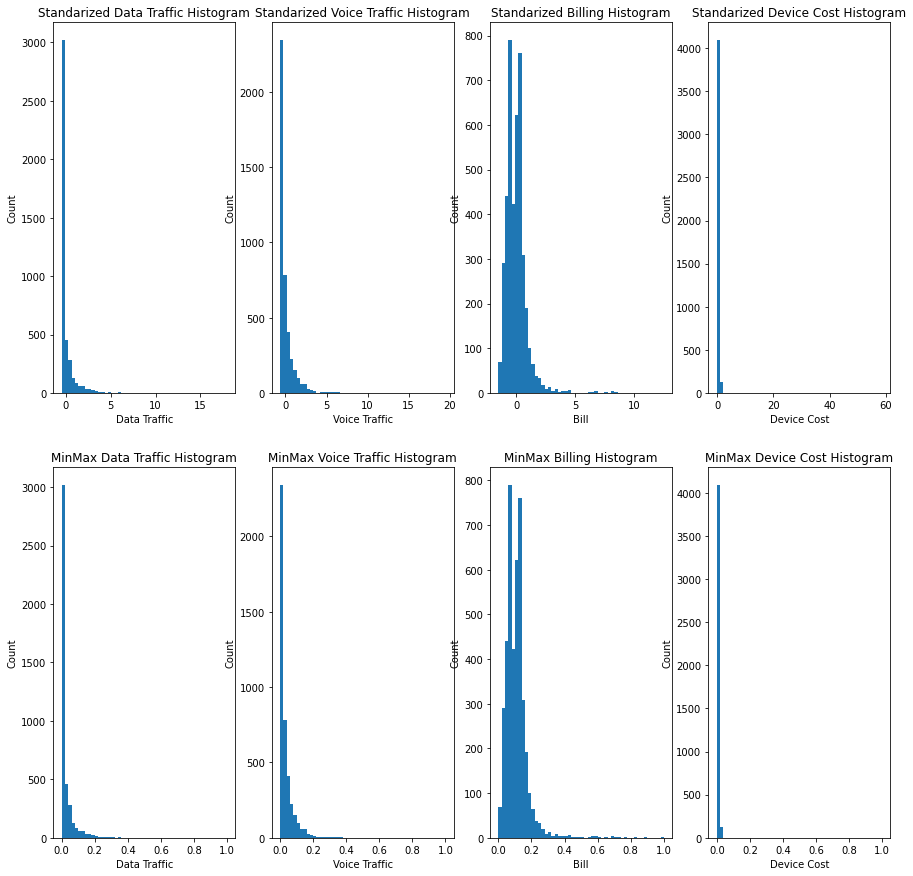

In [23]:
# Create each one of the new columns
df2['DATA_TRAFFIC_MONTH_1_STAND'] = StandardScaler().fit_transform(df2[['DATA_TRAFFIC_MONTH_1']])
df2['DATA_TRAFFIC_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(df2[['DATA_TRAFFIC_MONTH_1']])
df2['VOICE_TRAFFIC_MONTH_1_STAND'] = StandardScaler().fit_transform(df2[['VOICE_TRAFFIC_MONTH_1']])
df2['VOICE_TRAFFIC_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(df2[['VOICE_TRAFFIC_MONTH_1']])
df2['BILLING_MONTH_1_STAND'] = StandardScaler().fit_transform(df2[['BILLING_MONTH_1']])
df2['BILLING_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(df2[['BILLING_MONTH_1']])
df2['DEVICE_COST_MONTH_1_STAND'] = StandardScaler().fit_transform(df2[['DEVICE_COST_MONTH_1']])
df2['DEVICE_COST_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(df2[['DEVICE_COST_MONTH_1']])

display(df2)
# Create and plot the histograms
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(nrows=2, ncols=4, figsize = (15,15))


ax0.hist(df2.DATA_TRAFFIC_MONTH_1_STAND, bins=50)
plt.setp(ax0, xlabel='Data Traffic')
plt.setp(ax0, ylabel='Count')
ax0.set_title("Standarized Data Traffic Histogram", fontsize = 12.0)

ax1.hist(df2.VOICE_TRAFFIC_MONTH_1_STAND, bins=50)
plt.setp(ax1, xlabel='Voice Traffic')
plt.setp(ax1, ylabel='Count')
ax1.set_title("Standarized Voice Traffic Histogram", fontsize = 12.0)

ax2.hist(df2.BILLING_MONTH_1_STAND, bins=50)
plt.setp(ax2, xlabel='Bill')
plt.setp(ax2, ylabel='Count')
ax2.set_title("Standarized Billing Histogram", fontsize = 12.0)

ax3.hist(df2.DEVICE_COST_MONTH_1_STAND, bins=50)
plt.setp(ax3, xlabel='Device Cost')
plt.setp(ax3, ylabel='Count')
ax3.set_title("Standarized Device Cost Histogram", fontsize = 12.0)

ax4.hist(df2.DATA_TRAFFIC_MONTH_1_MINMAX, bins=50)
plt.setp(ax4, xlabel='Data Traffic')
plt.setp(ax4, ylabel='Count')
ax4.set_title("MinMax Data Traffic Histogram", fontsize = 12.0)

ax5.hist(df2.VOICE_TRAFFIC_MONTH_1_MINMAX, bins=50)
plt.setp(ax5, xlabel='Voice Traffic')
plt.setp(ax5, ylabel='Count')
ax5.set_title("MinMax Voice Traffic Histogram", fontsize = 12.0)

ax6.hist(df2.BILLING_MONTH_1_MINMAX, bins=50)
plt.setp(ax6, xlabel='Bill')
plt.setp(ax6, ylabel='Count')
ax6.set_title("MinMax Billing Histogram", fontsize = 12.0)

ax7.hist(df2.DEVICE_COST_MONTH_1_MINMAX, bins=50)
plt.setp(ax7, xlabel='Device Cost')
plt.setp(ax7, ylabel='Count')
ax7.set_title("MinMax Device Cost Histogram", fontsize = 12.0)

## 2.5. Convert categorical columns to dummy binary variables

In [24]:
df2['PREVIOUS_DEVICE_MODEL_INT_ENCODED'] = LabelEncoder().fit_transform(df2['PREVIOUS_DEVICE_MODEL']) # Encoding the device model
display(df2)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREVIOUS_DEVICE_BRAND,DATA_TRAFFIC_MONTH_1_STAND,DATA_TRAFFIC_MONTH_1_MINMAX,VOICE_TRAFFIC_MONTH_1_STAND,VOICE_TRAFFIC_MONTH_1_MINMAX,BILLING_MONTH_1_STAND,BILLING_MONTH_1_MINMAX,DEVICE_COST_MONTH_1_STAND,DEVICE_COST_MONTH_1_MINMAX,PREVIOUS_DEVICE_MODEL_INT_ENCODED
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,Samsung,-0.404557,0.002066,-0.635999,0.000900,-0.814598,0.051295,-0.121701,0.000000,349
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,Apple,0.254411,0.037853,0.205836,0.042718,-0.618884,0.065187,-0.066906,0.000932,458
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,Outros,0.378670,0.044601,1.224847,0.093338,0.146029,0.119483,-0.121701,0.000000,113
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,2017-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.50000,...,Outros,-0.442596,0.000000,-0.123067,0.026380,0.026654,0.111009,-0.121701,0.000000,91
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2015-07-01,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.89999,...,Motorola,-0.257986,0.010026,1.161220,0.090177,-0.089984,0.102730,-0.121701,0.000000,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI...,777.0,2016-10-01,6128.30660,3760.83910,3760.83910,7806.48000,10558.91200,14171.10200,1.20000,...,Apple,0.561167,0.054512,-0.648235,0.000292,1.276823,0.199750,-0.121701,0.000000,463
9991,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,2015-02-01,3534.23830,1978.74760,1978.74760,1949.49350,1287.23540,1152.37480,109.70000,...,Samsung,0.136281,0.031437,-0.117194,0.026672,0.531223,0.146825,-0.121701,0.000000,353
9992,TGMO36012000_MOTOROLA XT1925 SMARTPHONE INDIGO,561.0,2016-01-01,634.19067,634.19067,105.11343,4992.17820,6392.00830,6392.00830,146.30000,...,Samsung,-0.338721,0.005641,0.061941,0.035570,-1.537236,0.000000,-0.121701,0.000000,382
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,Apple,3.574557,0.218162,0.557253,0.060175,-0.731720,0.057178,-0.121701,0.000000,463


In [25]:
brands = pd.get_dummies(df2['PREVIOUS_DEVICE_BRAND'], prefix='Brand') # Create an array with the different brands that appear
df2 = df2.join(brands) # One-hot encoding
display(df2)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MONTH_1_STAND,BILLING_MONTH_1_MINMAX,DEVICE_COST_MONTH_1_STAND,DEVICE_COST_MONTH_1_MINMAX,PREVIOUS_DEVICE_MODEL_INT_ENCODED,Brand_Apple,Brand_LG,Brand_Motorola,Brand_Outros,Brand_Samsung
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,-0.814598,0.051295,-0.121701,0.000000,349,0,0,0,0,1
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,-0.618884,0.065187,-0.066906,0.000932,458,1,0,0,0,0
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.146029,0.119483,-0.121701,0.000000,113,0,0,0,1,0
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,2017-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.50000,...,0.026654,0.111009,-0.121701,0.000000,91,0,0,0,1,0
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2015-07-01,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.89999,...,-0.089984,0.102730,-0.121701,0.000000,213,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI...,777.0,2016-10-01,6128.30660,3760.83910,3760.83910,7806.48000,10558.91200,14171.10200,1.20000,...,1.276823,0.199750,-0.121701,0.000000,463,1,0,0,0,0
9991,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,2015-02-01,3534.23830,1978.74760,1978.74760,1949.49350,1287.23540,1152.37480,109.70000,...,0.531223,0.146825,-0.121701,0.000000,353,0,0,0,0,1
9992,TGMO36012000_MOTOROLA XT1925 SMARTPHONE INDIGO,561.0,2016-01-01,634.19067,634.19067,105.11343,4992.17820,6392.00830,6392.00830,146.30000,...,-1.537236,0.000000,-0.121701,0.000000,382,0,0,0,0,1
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,-0.731720,0.057178,-0.121701,0.000000,463,1,0,0,0,0


## 2.6. Feature generation

In [26]:
# Computing the mean, max, min and range of the 6-month variables
df2['DATA_TRAFFIC_MEAN'] = df2[['DATA_TRAFFIC_MONTH_1','DATA_TRAFFIC_MONTH_2','DATA_TRAFFIC_MONTH_3',
                                'DATA_TRAFFIC_MONTH_4','DATA_TRAFFIC_MONTH_5','DATA_TRAFFIC_MONTH_6']].mean(axis=1) 
df2['DATA_TRAFFIC_MAX'] = df2[['DATA_TRAFFIC_MONTH_1','DATA_TRAFFIC_MONTH_2','DATA_TRAFFIC_MONTH_3',
                                'DATA_TRAFFIC_MONTH_4','DATA_TRAFFIC_MONTH_5','DATA_TRAFFIC_MONTH_6']].max(axis=1)
df2['DATA_TRAFFIC_MIN'] = df2[['DATA_TRAFFIC_MONTH_1','DATA_TRAFFIC_MONTH_2','DATA_TRAFFIC_MONTH_3',
                                'DATA_TRAFFIC_MONTH_4','DATA_TRAFFIC_MONTH_5','DATA_TRAFFIC_MONTH_6']].min(axis=1)
df2['DATA_TRAFFIC_RANGE'] = df2['DATA_TRAFFIC_MAX']- df2['DATA_TRAFFIC_MIN']


df2['VOICE_TRAFFIC_MEAN'] = df2[['VOICE_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_3',
                                'VOICE_TRAFFIC_MONTH_4','VOICE_TRAFFIC_MONTH_5','VOICE_TRAFFIC_MONTH_6']].mean(axis=1)
df2['VOICE_TRAFFIC_MAX'] = df2[['VOICE_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_3',
                                'VOICE_TRAFFIC_MONTH_4','VOICE_TRAFFIC_MONTH_5','VOICE_TRAFFIC_MONTH_6']].max(axis=1)
df2['VOICE_TRAFFIC_MIN'] = df2[['VOICE_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_3',
                                'VOICE_TRAFFIC_MONTH_4','VOICE_TRAFFIC_MONTH_5','VOICE_TRAFFIC_MONTH_6']].min(axis=1)
df2['VOICE_TRAFFIC_RANGE'] = df2['VOICE_TRAFFIC_MAX']- df2['VOICE_TRAFFIC_MIN']


df2['BILLING_MEAN'] = df2[['BILLING_MONTH_1','BILLING_MONTH_2','BILLING_MONTH_3',
                           'BILLING_MONTH_4','BILLING_MONTH_5','BILLING_MONTH_6']].mean(axis=1)
df2['BILLING_MAX'] = df2[['BILLING_MONTH_1','BILLING_MONTH_2','BILLING_MONTH_3',
                           'BILLING_MONTH_4','BILLING_MONTH_5','BILLING_MONTH_6']].max(axis=1)
df2['BILLING_MIN'] = df2[['BILLING_MONTH_1','BILLING_MONTH_2','BILLING_MONTH_3',
                           'BILLING_MONTH_4','BILLING_MONTH_5','BILLING_MONTH_6']].min(axis=1)
df2['BILLING_RANGE'] = df2['BILLING_MAX']- df2['BILLING_MIN']


df2['DEVICE_COST_MEAN'] = df2[['DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2','DEVICE_COST_MONTH_3',
                               'DEVICE_COST_MONTH_4','DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6']].mean(axis=1)
df2['DEVICE_COST_MAX'] = df2[['DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2','DEVICE_COST_MONTH_3',
                               'DEVICE_COST_MONTH_4','DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6']].max(axis=1)
df2['DEVICE_COST_MIN'] = df2[['DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2','DEVICE_COST_MONTH_3',
                               'DEVICE_COST_MONTH_4','DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6']].min(axis=1)
df2['DEVICE_COST_RANGE'] = df2['DEVICE_COST_MAX']- df2['DEVICE_COST_MIN']

display(df2)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.50000,4.40000,49.435000,56.56,47.00,9.56,0.0,0.0,0.0,0.0
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,119.00000,112.20000,58.216667,60.93,55.99,4.94,6.0,6.0,6.0,0.0
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.00000,383.89999,109.700000,110.69,107.99,2.70,0.0,0.0,0.0,0.0
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,2017-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.50000,...,0.00000,108.50000,101.768333,102.84,99.99,2.85,0.0,0.0,0.0,0.0
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2015-07-01,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.89999,...,293.79999,146.70001,93.883333,95.77,90.99,4.78,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI...,777.0,2016-10-01,6128.30660,3760.83910,3760.83910,7806.48000,10558.91200,14171.10200,1.20000,...,0.00000,39.50000,117.693333,185.05,102.99,82.06,0.0,0.0,0.0,0.0
9991,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,2015-02-01,3534.23830,1978.74760,1978.74760,1949.49350,1287.23540,1152.37480,109.70000,...,58.00000,91.50000,151.125000,176.23,136.02,40.21,0.0,0.0,0.0,0.0
9992,TGMO36012000_MOTOROLA XT1925 SMARTPHONE INDIGO,561.0,2016-01-01,634.19067,634.19067,105.11343,4992.17820,6392.00830,6392.00830,146.30000,...,0.00000,485.39999,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,119.70000,134.00000,52.486667,52.97,51.67,1.30,0.0,0.0,0.0,0.0


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,4.40000,49.435000,56.56,47.00,9.56,0.0,0.0,0.0,0.0,0.000000
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,112.20000,58.216667,60.93,55.99,4.94,6.0,6.0,6.0,0.0,0.103063
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,383.89999,109.700000,110.69,107.99,2.70,0.0,0.0,0.0,0.0,0.000000
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,2017-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.50000,...,108.50000,101.768333,102.84,99.99,2.85,0.0,0.0,0.0,0.0,0.000000
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2015-07-01,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.89999,...,146.70001,93.883333,95.77,90.99,4.78,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI...,777.0,2016-10-01,6128.30660,3760.83910,3760.83910,7806.48000,10558.91200,14171.10200,1.20000,...,39.50000,117.693333,185.05,102.99,82.06,0.0,0.0,0.0,0.0,0.000000
9991,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,2015-02-01,3534.23830,1978.74760,1978.74760,1949.49350,1287.23540,1152.37480,109.70000,...,91.50000,151.125000,176.23,136.02,40.21,0.0,0.0,0.0,0.0,0.000000
9992,TGMO36012000_MOTOROLA XT1925 SMARTPHONE INDIGO,561.0,2016-01-01,634.19067,634.19067,105.11343,4992.17820,6392.00830,6392.00830,146.30000,...,485.39999,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,134.00000,52.486667,52.97,51.67,1.30,0.0,0.0,0.0,0.0,0.000000


Text(0.5, 1.0, 'Device Cost to Billing Ratio Histogram')

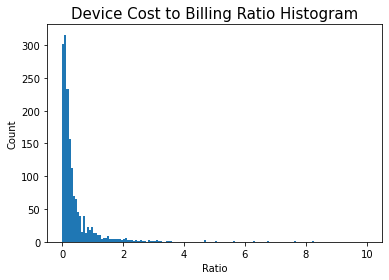

In [27]:
df2['DEVICE_COST_TO_BILLING_RATIO'] = df2['DEVICE_COST_MEAN']/df2['BILLING_MEAN'] # Computing the ratio between Device Cost and Billing
display(df2)

plt.hist(df2.DEVICE_COST_TO_BILLING_RATIO, bins=150, range = (0.01,10)) # Define the boundaries of the ratio to ignore 0s.
plt.xlabel( xlabel='Ratio')
plt.ylabel(ylabel='Count')
plt.title("Device Cost to Billing Ratio Histogram", fontsize = 15.0)

<font size="+1">I would say that this histogram is another exponential distribution</font>

## 2.7. Text parsing/processing

In [28]:

df2[['PURCHASED_DEVICE_CODE','PURCHASED_DEVICE_MANUFACTURER','PURCHASED_DEVICE_MODEL']] = df2['PURCHASED_DEVICE'].str.split('_| ',2, expand = True) # Divide the text with the first'_' and the first space in 3 strings
display(df2)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,47.00,9.56,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,55.99,4.94,6.0,6.0,6.0,0.0,0.103063,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,107.99,2.70,0.0,0.0,0.0,0.0,0.000000,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,2017-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.50000,...,99.99,2.85,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2015-07-01,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.89999,...,90.99,4.78,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI...,777.0,2016-10-01,6128.30660,3760.83910,3760.83910,7806.48000,10558.91200,14171.10200,1.20000,...,102.99,82.06,0.0,0.0,0.0,0.0,0.000000,TGSA31442007,SAMSUNG,J600GT SMART PRATA PPB/PI107/04
9991,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,2015-02-01,3534.23830,1978.74760,1978.74760,1949.49350,1287.23540,1152.37480,109.70000,...,136.02,40.21,0.0,0.0,0.0,0.0,0.000000,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
9992,TGMO36012000_MOTOROLA XT1925 SMARTPHONE INDIGO,561.0,2016-01-01,634.19067,634.19067,105.11343,4992.17820,6392.00830,6392.00830,146.30000,...,0.00,0.00,0.0,0.0,0.0,0.0,NaN,TGMO36012000,MOTOROLA,XT1925 SMARTPHONE INDIGO
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,51.67,1.30,0.0,0.0,0.0,0.0,0.000000,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO


In [29]:
purchased_df = pd.DataFrame(columns=['Manufacturer', 'Frequency'])
for idx, name in enumerate(df2.PURCHASED_DEVICE_MANUFACTURER.value_counts().index.tolist()):
    purchased_df = purchased_df.append({'Manufacturer': name, 'Frequency': df2.PURCHASED_DEVICE_MANUFACTURER.value_counts()[idx]},ignore_index=True)
display(purchased_df)

previous_df = pd.DataFrame(columns=['Manufacturer', 'Frequency'])
for idx, name in enumerate(df2.PREVIOUS_DEVICE_MANUF.value_counts().index.tolist()):
    previous_df = purchased_df.append({'Manufacturer': name, 'Frequency': df2.PREVIOUS_DEVICE_MANUF.value_counts()[idx]},ignore_index=True)
display(previous_df)

,Manufacturer,Frequency
0,LG,2430
1,SAMSUNG,814
2,MOTOROLA,471
3,APPLE,330
4,ALCATEL,185


,Manufacturer,Frequency
0,LG,2430
1,SAMSUNG,814
2,MOTOROLA,471
3,APPLE,330
4,ALCATEL,185
5,HTC Corporation,1


## 2.8. Splitting and sampling a dataset

In [30]:
df_train, df_test = train_test_split(df2, test_size=0.3, random_state=42) # There is no y because we aren't using any variable as an output

In [31]:
print(df_train['DATA_TRAFFIC_MONTH_1'].describe()) # Use of describe to print the statistics instead of manually computation
print()
print(df_test['DATA_TRAFFIC_MONTH_1'].describe())

print('\n\n')

print(df_train['VOICE_TRAFFIC_MONTH_1'].describe())
print()
print(df_test['VOICE_TRAFFIC_MONTH_1'].describe())

print('\n\n')

print(df_train['BILLING_MONTH_1'].describe())
print()
print(df_test['BILLING_MONTH_1'].describe())

count      2961.000000
mean       2762.480880
std        6202.364825
min           0.000000
25%           0.000000
50%         469.448060
75%        2945.675500
max      112421.170000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

count      1269.000000
mean       2561.532412
std        5875.193105
min           0.000000
25%           0.000000
50%         330.794220
75%        2561.558300
max      100259.960000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64



count    2961.000000
mean      134.747112
std       206.719481
min         0.000000
25%        11.100000
50%        66.400002
75%       174.100010
max      4113.000000
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64

count    1269.000000
mean      131.071868
std       198.732770
min         0.000000
25%         6.400000
50%        63.799999
75%       172.100010
max      2861.000000
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64



count    2961.000000
mean      102.110294
std        66.153444
min         0.000000
25%        66.290000
50%      

<font size="+1">Initially it seems so similar, obviously it is slightly different because the size of the datasets and the instances of them are different but the variations between them are approximately of 5% maximum so we can conclude that both splits match together .</font>

# 3. Comparing iPhone and Samsung J series users

In [32]:
IPhone_df = df2[df2["PREVIOUS_DEVICE_MODEL"].str.contains("iPhone")] # Select only the iPhone users, those whose device field contains "iPhone"
display(IPhone_df)
SamsungJ_df = df2[df2["PREVIOUS_DEVICE_MODEL"].str.contains("Samsung Galaxy J")] # Select only the Samsung Galaxy J users
display(SamsungJ_df)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.117070,836.117070,691.556400,146.766600,302.492490,175.700000,...,55.99,4.94,6.0,6.0,6.0,0.0,0.103063,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,2017-01-01,1520.20560,2196.574500,2196.574500,1815.700900,2101.681600,3224.283400,206.899990,...,115.00,71.31,13.0,13.0,13.0,0.0,0.088564,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,2018-11-01,10789.82000,10423.674000,10423.674000,5188.596700,7379.404300,6789.482900,64.300003,...,109.99,39.99,0.0,0.0,0.0,0.0,0.000000,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.0,2017-09-01,990.27838,1011.097000,1011.097000,1025.969500,2778.350100,1822.950700,102.900000,...,60.99,2.96,124.0,124.0,124.0,0.0,1.984529,DGAP067C2000,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
19,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,109.83098,25.115547,25.115547,25.355312,17.540585,19.921484,64.900002,...,68.69,19.21,125.0,125.0,125.0,0.0,1.577353,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,2017-08-01,1031.42330,271.169530,271.169530,1549.046500,3828.154100,550.226440,358.299990,...,117.99,3.15,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9987,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-08-01,3997.31620,848.197390,848.197390,1611.498400,1169.752900,1109.605700,65.000000,...,165.36,24.81,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9989,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,513.0,2016-10-01,5656.49120,4798.865200,4798.865200,5056.850600,4584.034700,5088.202600,104.700000,...,102.99,110.23,0.0,0.0,0.0,0.0,0.000000,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04
9990,TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI...,777.0,2016-10-01,6128.30660,3760.839100,3760.839100,7806.480000,10558.912000,14171.102000,1.200000,...,102.99,82.06,0.0,0.0,0.0,0.0,0.000000,TGSA31442007,SAMSUNG,J600GT SMART PRATA PPB/PI107/04


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.241210,272.255250,272.255250,704.885190,412.716640,365.144410,3.700000,...,47.00,9.56,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2014-11-01,793.156010,734.519960,734.519960,156.381210,467.952330,721.303890,2.700000,...,50.99,1.01,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
11,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,321.0,2017-06-01,4.177461,4.177461,1.889648,8.758789,0.000000,0.000000,12.300000,...,103.10,0.04,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
23,TGSA32564007_SAMSUNG J260M SMART PRETO PPB/PI...,633.0,2016-08-01,4.528594,464.087740,695.095950,223.330200,223.330200,247.853820,298.000000,...,45.59,24.30,2.5,15.0,0.0,15.0,0.040427,TGSA32564007,SAMSUNG,J260M SMART PRETO PPB/PI324/14
27,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-07-01,3901.060300,2646.626700,2646.626700,1239.496800,1124.442400,662.106630,66.400002,...,40.99,4.23,23.0,23.0,23.0,0.0,0.545045,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,237.0,2015-12-01,6.754258,136.512190,136.512190,36.707500,10.009492,33.826366,92.099998,...,109.99,3.15,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9981,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.99,3.57,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9982,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.100000,...,33.99,1.80,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9991,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,2015-02-01,3534.238300,1978.747600,1978.747600,1949.493500,1287.235400,1152.374800,109.700000,...,136.02,40.21,0.0,0.0,0.0,0.0,0.000000,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10


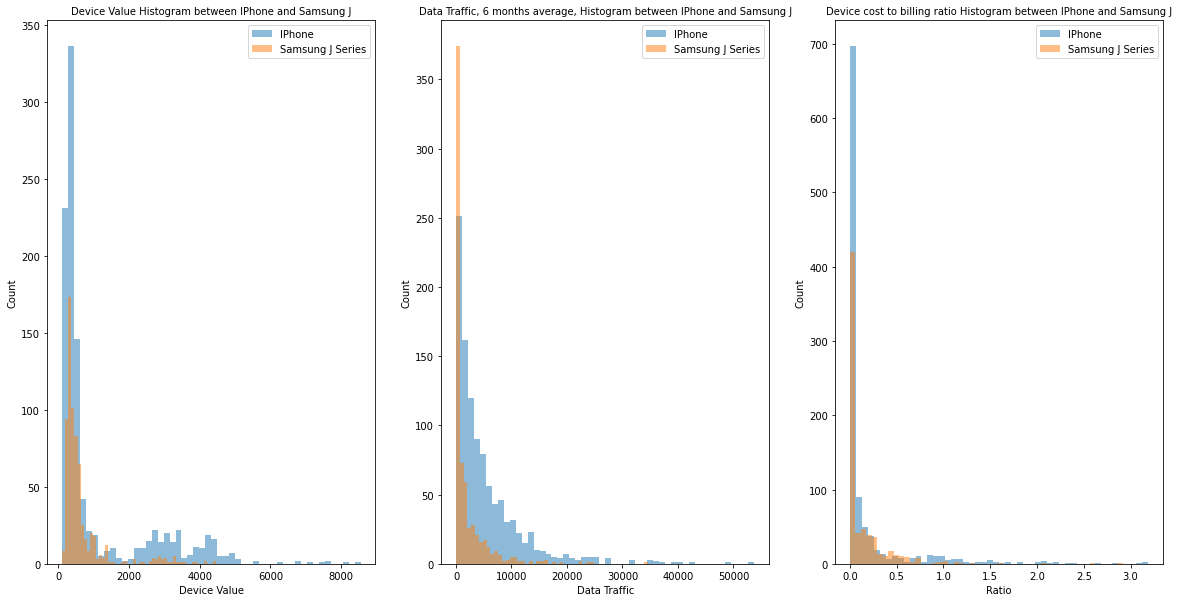

In [33]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(20,10))


# DEVICE VALUE HISTOGRAM
ax0.hist(IPhone_df.DEVICE_VALUE, bins=50, alpha=0.5, label="IPhone")
ax0.hist(SamsungJ_df.DEVICE_VALUE, bins=50, alpha=0.5, label="Samsung J Series")
plt.setp(ax0, xlabel='Device Value')
plt.setp(ax0, ylabel='Count')
ax0.set_title("Device Value Histogram between IPhone and Samsung J" , fontsize = 10.0)
ax0.legend(loc='upper right')

# DATA TRAFFIC MEAN HISTOGRAM
ax1.hist(IPhone_df.DATA_TRAFFIC_MEAN, bins=50, alpha=0.5, label="IPhone")
ax1.hist(SamsungJ_df.DATA_TRAFFIC_MEAN, bins=50, alpha=0.5, label="Samsung J Series")
plt.setp(ax1, xlabel='Data Traffic')
plt.setp(ax1, ylabel='Count')
ax1.set_title("Data Traffic, 6 months average, Histogram between IPhone and Samsung J" , fontsize = 10.0)
ax1.legend(loc='upper right')

# COST TO BILLING RATIO HISTOGRAM
ax2.hist(IPhone_df.DEVICE_COST_TO_BILLING_RATIO, bins=50, alpha=0.5, label="IPhone")
ax2.hist(SamsungJ_df.DEVICE_COST_TO_BILLING_RATIO, bins=50, alpha=0.5, label="Samsung J Series")
plt.setp(ax2, xlabel='Ratio')
plt.setp(ax2, ylabel='Count')
ax2.set_title("Device cost to billing ratio Histogram between IPhone and Samsung J" , fontsize = 10.0)
ax2.legend(loc='upper right')


plt.show()

<font size="+1">Starting with the device value we can clearly see that IPhone users have more expensive devices by far, is it truth that there are more instances of IPhone than Samsung but there are much more of high-price IPhones than Samsung. In the next plot we can see that the data traffic among the IPhone than Samsung users. Lastly in the cost--billing ratio plot we can see more high and low-ratios in Apple but more mid-ratios in Samsung.</font>

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Since Decision Tree Model of sklearn does not handle categorical data we must substitute the PREVIOUS_DEVICE_MODEL 
# by their int encoded analog and PREVIOUS_DEVICE_BRAND by the one-hot encoded columns, the binary variables. So the 
# datasets would be:

X_3 = df2[['PREVIOUS_DEVICE_MODEL_INT_ENCODED','Brand_Apple','Brand_LG','Brand_Motorola','Brand_Outros','Brand_Samsung','MONTHS_LAST_DEVICE']]
display(X_3) 
X_5 = df2[['PREVIOUS_DEVICE_MODEL_INT_ENCODED','Brand_Apple','Brand_LG','Brand_Motorola','Brand_Outros','Brand_Samsung','MONTHS_LAST_DEVICE','DEVICE_VALUE','DATA_TRAFFIC_MEAN']]
display(X_5)
y = df2['PURCHASED_DEVICE_MANUFACTURER'] # Output variable dataset 

# Splitting datasets
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y, test_size=0.3, random_state=42)
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier() # Init DTC

clf = clf.fit(X_3_train, y_3_train) # Fit the DTC to our 3 vars dataset
predictions_3 = clf.predict(X_3_test) # Test the dataset

clf = clf.fit(X_5_train, y_5_train) # Fit the DTC to our 5 vars dataset
predictions_5 = clf.predict(X_5_test)

# Print the accuracy of the predictions of both datasets
print(("The accuracy with of 3 variables is: {}.\nNow, with 5 variables the accuracy is: {}.\nThe accuracy has increased {}%.").format(round(accuracy_score(y_3_test, predictions_3),4),round(accuracy_score(y_5_test, predictions_5),4),round((accuracy_score(y_5_test, predictions_5)-accuracy_score(y_3_test, predictions_3))*100,2)))


,PREVIOUS_DEVICE_MODEL_INT_ENCODED,Brand_Apple,Brand_LG,Brand_Motorola,Brand_Outros,Brand_Samsung,MONTHS_LAST_DEVICE
1,349,0,0,0,0,1,26.333333
3,458,1,0,0,0,0,20.233333
4,113,0,0,0,1,0,5.000000
5,91,0,0,0,1,0,21.233333
6,213,0,0,1,0,0,47.666667
...,...,...,...,...,...,...,...
9990,463,1,0,0,0,0,32.400000
9991,353,0,0,0,0,1,52.666667
9992,382,0,0,0,0,1,41.533333
9995,463,1,0,0,0,0,26.333333


,PREVIOUS_DEVICE_MODEL_INT_ENCODED,Brand_Apple,Brand_LG,Brand_Motorola,Brand_Outros,Brand_Samsung,MONTHS_LAST_DEVICE,DEVICE_VALUE,DATA_TRAFFIC_MEAN
1,349,0,0,0,0,1,26.333333,345.0,376.582992
3,458,1,0,0,0,0,20.233333,345.0,1178.085005
4,113,0,0,0,1,0,5.000000,609.0,2729.056633
5,91,0,0,0,1,0,21.233333,297.0,0.000000
6,213,0,0,1,0,0,47.666667,345.0,388.543168
...,...,...,...,...,...,...,...,...,...
9990,463,1,0,0,0,0,32.400000,777.0,7697.746467
9991,353,0,0,0,0,1,52.666667,2841.0,1980.139533
9992,382,0,0,0,0,1,41.533333,561.0,3191.614928
9995,463,1,0,0,0,0,26.333333,1041.0,15216.369733


The accuracy with of 3 variables is: 0.5004.
Now, with 5 variables the accuracy is: 0.7983.
The accuracy has increased 29.79%.


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>